In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## PREPARACION DE DATOS

In [2]:
train_recovery = pd.read_csv('/datasets/gold_recovery_train.csv')
test_recovery = pd.read_csv('/datasets/gold_recovery_test.csv')
full_recovery = pd.read_csv('/datasets/gold_recovery_full.csv')

## ANALISIS INICIAL

In [3]:
train_recovery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [4]:
train_recovery.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
test_recovery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [6]:
test_recovery.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
full_recovery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


In [8]:
full_recovery.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


## CALCULO DE RECUPERACION

In [9]:
F = train_recovery['rougher.input.feed_au']
C = train_recovery['rougher.output.concentrate_au']
T = train_recovery['rougher.output.tail_au']

calculated_recovery = ((C * (F - T)) / (F * (C - T))) * 100


In [10]:
calculated_recovery = calculated_recovery.replace([np.inf, -np.inf], np.nan)
calculated_recovery = calculated_recovery.dropna()
valores_reales = train_recovery['rougher.output.recovery']

In [11]:
#comparacion de calculo de recuperacion vs la columna del dataset original
print("Recuperacion media del dataset original:", valores_reales.mean())

Recuperacion media del dataset original: 82.39420120842001


### PREPARACION DE DATOS PARA LA COMPARACION DE VALORES EAM

In [12]:
# unir en un DataFrame temporal para filtrar
df_check = pd.DataFrame({
    "real": valores_reales,
    "pred": calculated_recovery
})

# eliminar filas con NaN o inf
df_check = df_check.replace([np.inf, -np.inf], np.nan).dropna()

### COMPARACION EAM DE DATOS REALES VS MIS CALCULOS

In [13]:
eam = mean_absolute_error(df_check["real"], df_check["pred"])
print("Error absoluto medio:", eam)

Error absoluto medio: 9.303415616264301e-15


In [14]:
print(calculated_recovery.describe())
print(valores_reales.describe())

count     14547.000000
mean         31.414147
std        3302.773106
min     -366924.161290
25%          79.704808
50%          85.229912
75%          90.203432
max       13802.071756
dtype: float64
count    14287.000000
mean        82.394201
std         15.096808
min          0.000000
25%         79.818372
50%         85.235997
75%         90.131691
max        100.000000
Name: rougher.output.recovery, dtype: float64


## CARACTERISTICAS NO DISPONIBLES EN EL CONJUNTO DE PRUEBA

In [15]:
#Obtenemos columnas de cada dataset
train_columns = set(train_recovery.columns)
test_columns = set(test_recovery.columns)
#Encontramos caracteristicas faltantes
missing_features = train_columns - test_columns

print("Características faltantes en el conjunto de prueba:")
print(f"Total: {len(missing_features)} características")
for feature in sorted(missing_features):
    print(f"- {feature}")

SOBRE LAS CARACTERISTICAS NO DISPONIBLES:
Despues de analisar detenidamente las columnas o datos faltantes en el set de datos de evaluacion, se puede decir que estos datos contribuyen a la salida, resultado y/o datos finales, es decir, datos objetivos que se obtienen al correr los datos caracteristicas. Esto significa que la informacion faltante en el dataset de evaluacion cuenta como variables objetivos que pueden ser obtenidos mediante la informacion que si se tiene en el dataset (caracteristicas).

### PREPROCESAMIENTO DE DATOS Y LIMPIEZA

In [16]:
#Hice una copia de los dataframes en caso de que necesite revertir algun cambio
train_df = train_recovery.copy()
test_df = test_recovery.copy()
full_df = full_recovery.copy()

In [17]:
print("Forma del dataset de entrenamiento:", train_df.shape)
print("\nValores faltantes:")
print(train_df.isnull().sum().sort_values(ascending=False).head(10))

Forma del dataset de entrenamiento: (16860, 87)

Valores faltantes:
rougher.output.recovery               2573
rougher.output.tail_ag                2250
rougher.output.tail_sol               2249
rougher.output.tail_au                2249
secondary_cleaner.output.tail_sol     1986
rougher.input.floatbank11_xanthate    1904
final.output.recovery                 1521
primary_cleaner.input.sulfate         1307
primary_cleaner.input.depressant      1262
rougher.calculation.au_pb_ratio       1242
dtype: int64


In [18]:
train_df[train_df['rougher.output.recovery'].isna() == True]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
53,2016-01-17 05:00:00,5.919503,11.078044,6.215769,42.922611,71.308281,10.866006,1.577753,17.550397,2.476280,...,13.972224,-548.238797,12.042964,-550.430774,9.989624,-499.606754,7.950446,-500.352648,12.011728,-599.043399
99,2016-01-19 03:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,13.985160,-799.601232,12.036072,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756
100,2016-01-19 04:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,14.034374,-799.600946,12.040491,-623.446329,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301
101,2016-01-19 05:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,13.943929,-799.600659,12.040238,-638.103348,9.956309,-499.791870,7.978806,-500.202026,11.987839,-600.302819
102,2016-01-19 06:00:00,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,14.040873,-799.600372,12.030771,-641.310327,9.966952,-499.842458,8.053455,-499.588522,11.987935,-600.523057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16697,2018-08-11 16:59:59,3.958494,10.765712,7.887805,46.249962,70.871419,14.793868,4.400949,8.613606,3.868595,...,22.986898,-501.051083,20.046078,-501.394212,17.982038,-499.849382,12.989903,-500.207022,17.997144,-501.774775
16698,2018-08-11 17:59:59,4.004948,9.668969,8.652235,46.803491,56.203095,16.301126,5.009660,9.603387,5.517890,...,23.013058,-499.974814,19.987702,-499.084535,18.000712,-500.307173,13.019299,-500.132894,18.010586,-502.012474
16699,2018-08-11 18:59:59,3.725068,8.274357,8.841145,48.654627,49.317741,16.118560,5.002483,10.102624,5.733715,...,22.982590,-501.346407,20.033370,-500.583932,17.968434,-501.021691,12.960565,-500.076888,17.994091,-504.227412
16700,2018-08-11 19:59:59,3.455061,7.840984,8.833333,49.429785,50.760512,15.543128,4.780950,9.944061,5.851795,...,23.018285,-500.439620,20.007188,-500.244110,17.955487,-499.845317,13.024346,-500.219297,17.989071,-502.324529


## Visualizacion de patrones para eleccion de imputacion estrategica a valores nulos y analisis de los datos

#### A continuacion, se realizaron varios tipos de visualizaciones y analisis se investiga por que faltan valores, sus relaciones y principalmente para la determinacion del tipo de imputacion o procedimiento que se utilizara para reemplazar o eliminar los valores nulos

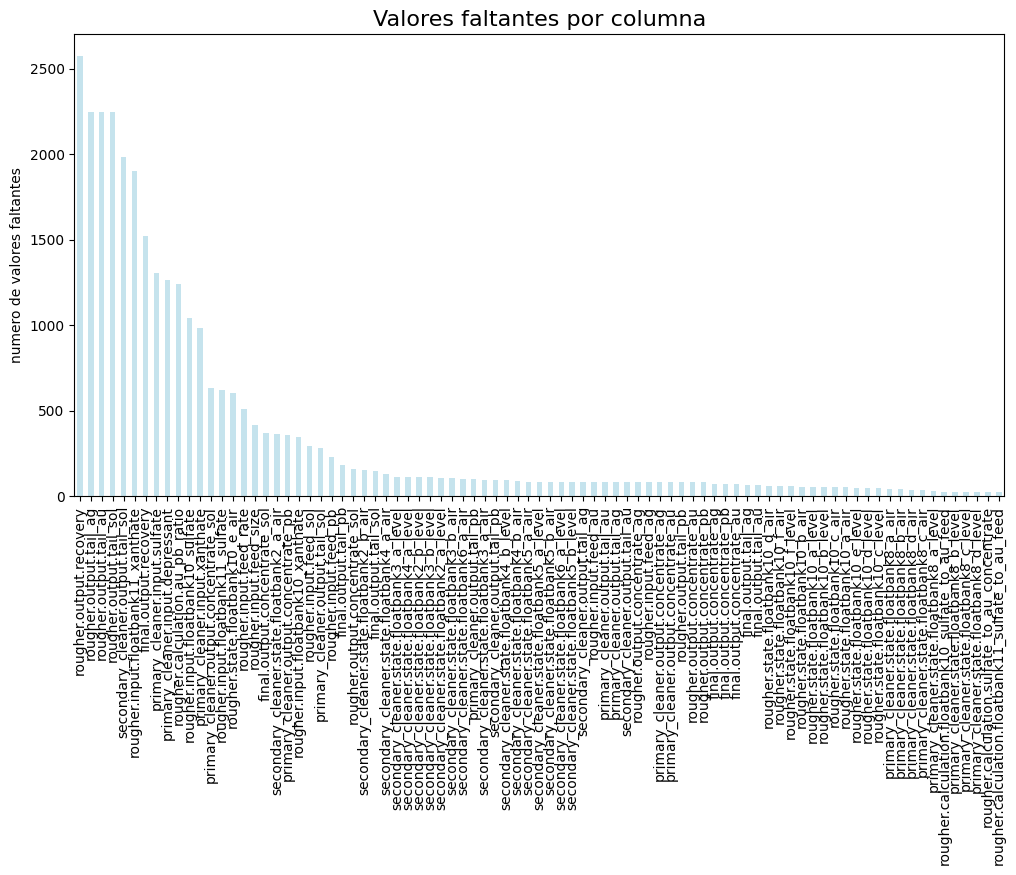

In [19]:
#Vamos a analizar los valores faltantes para asegurarnos de que no se pierda informacion crusial
#Grafico y visualizacion de valores faltantes por columnas
missing = train_df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(12,6))
missing.plot(kind='bar', color='lightblue', alpha=0.7)
plt.title('Valores faltantes por columna', fontsize=16)
plt.ylabel('numero de valores faltantes')
plt.xticks(rotation=90)
plt.show()

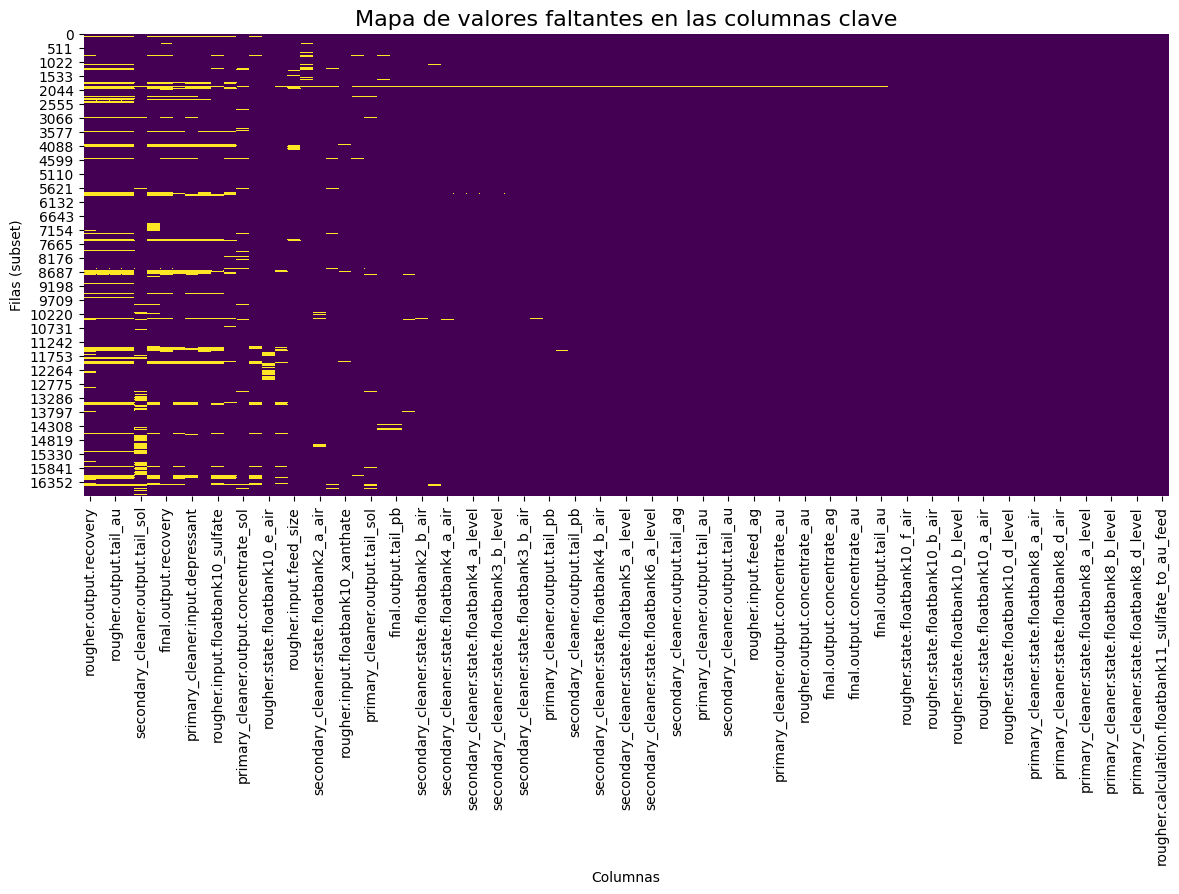

In [20]:
#heatmap para mejor visualizacion de valores faltantes y determinar si son aleatorios
plt.figure(figsize=(14,6))
sns.heatmap(train_df[missing.index].isna(), cbar=False, cmap="viridis")
plt.title("Mapa de valores faltantes en las columnas clave", fontsize=16)
plt.xlabel("Columnas")
plt.ylabel("Filas (subset)")
plt.show()


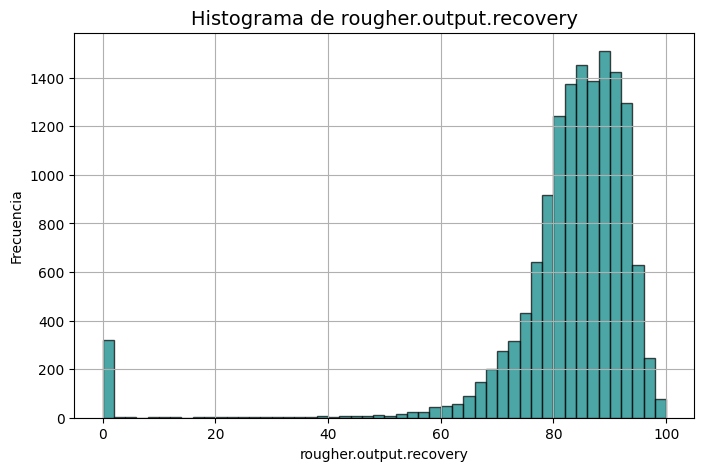

In [21]:
#histograma cerca de una columna en especifico para mas informacion
col = "rougher.output.recovery"  

plt.figure(figsize=(8,5))
train_df[col].hist(bins=50, color="teal", alpha=0.7, edgecolor="black")
plt.title(f"Histograma de {col}", fontsize=14)
plt.xlabel(col)
plt.ylabel("Frecuencia")
plt.show()


In [22]:
train_df['date'] = pd.to_datetime(train_df['date'])

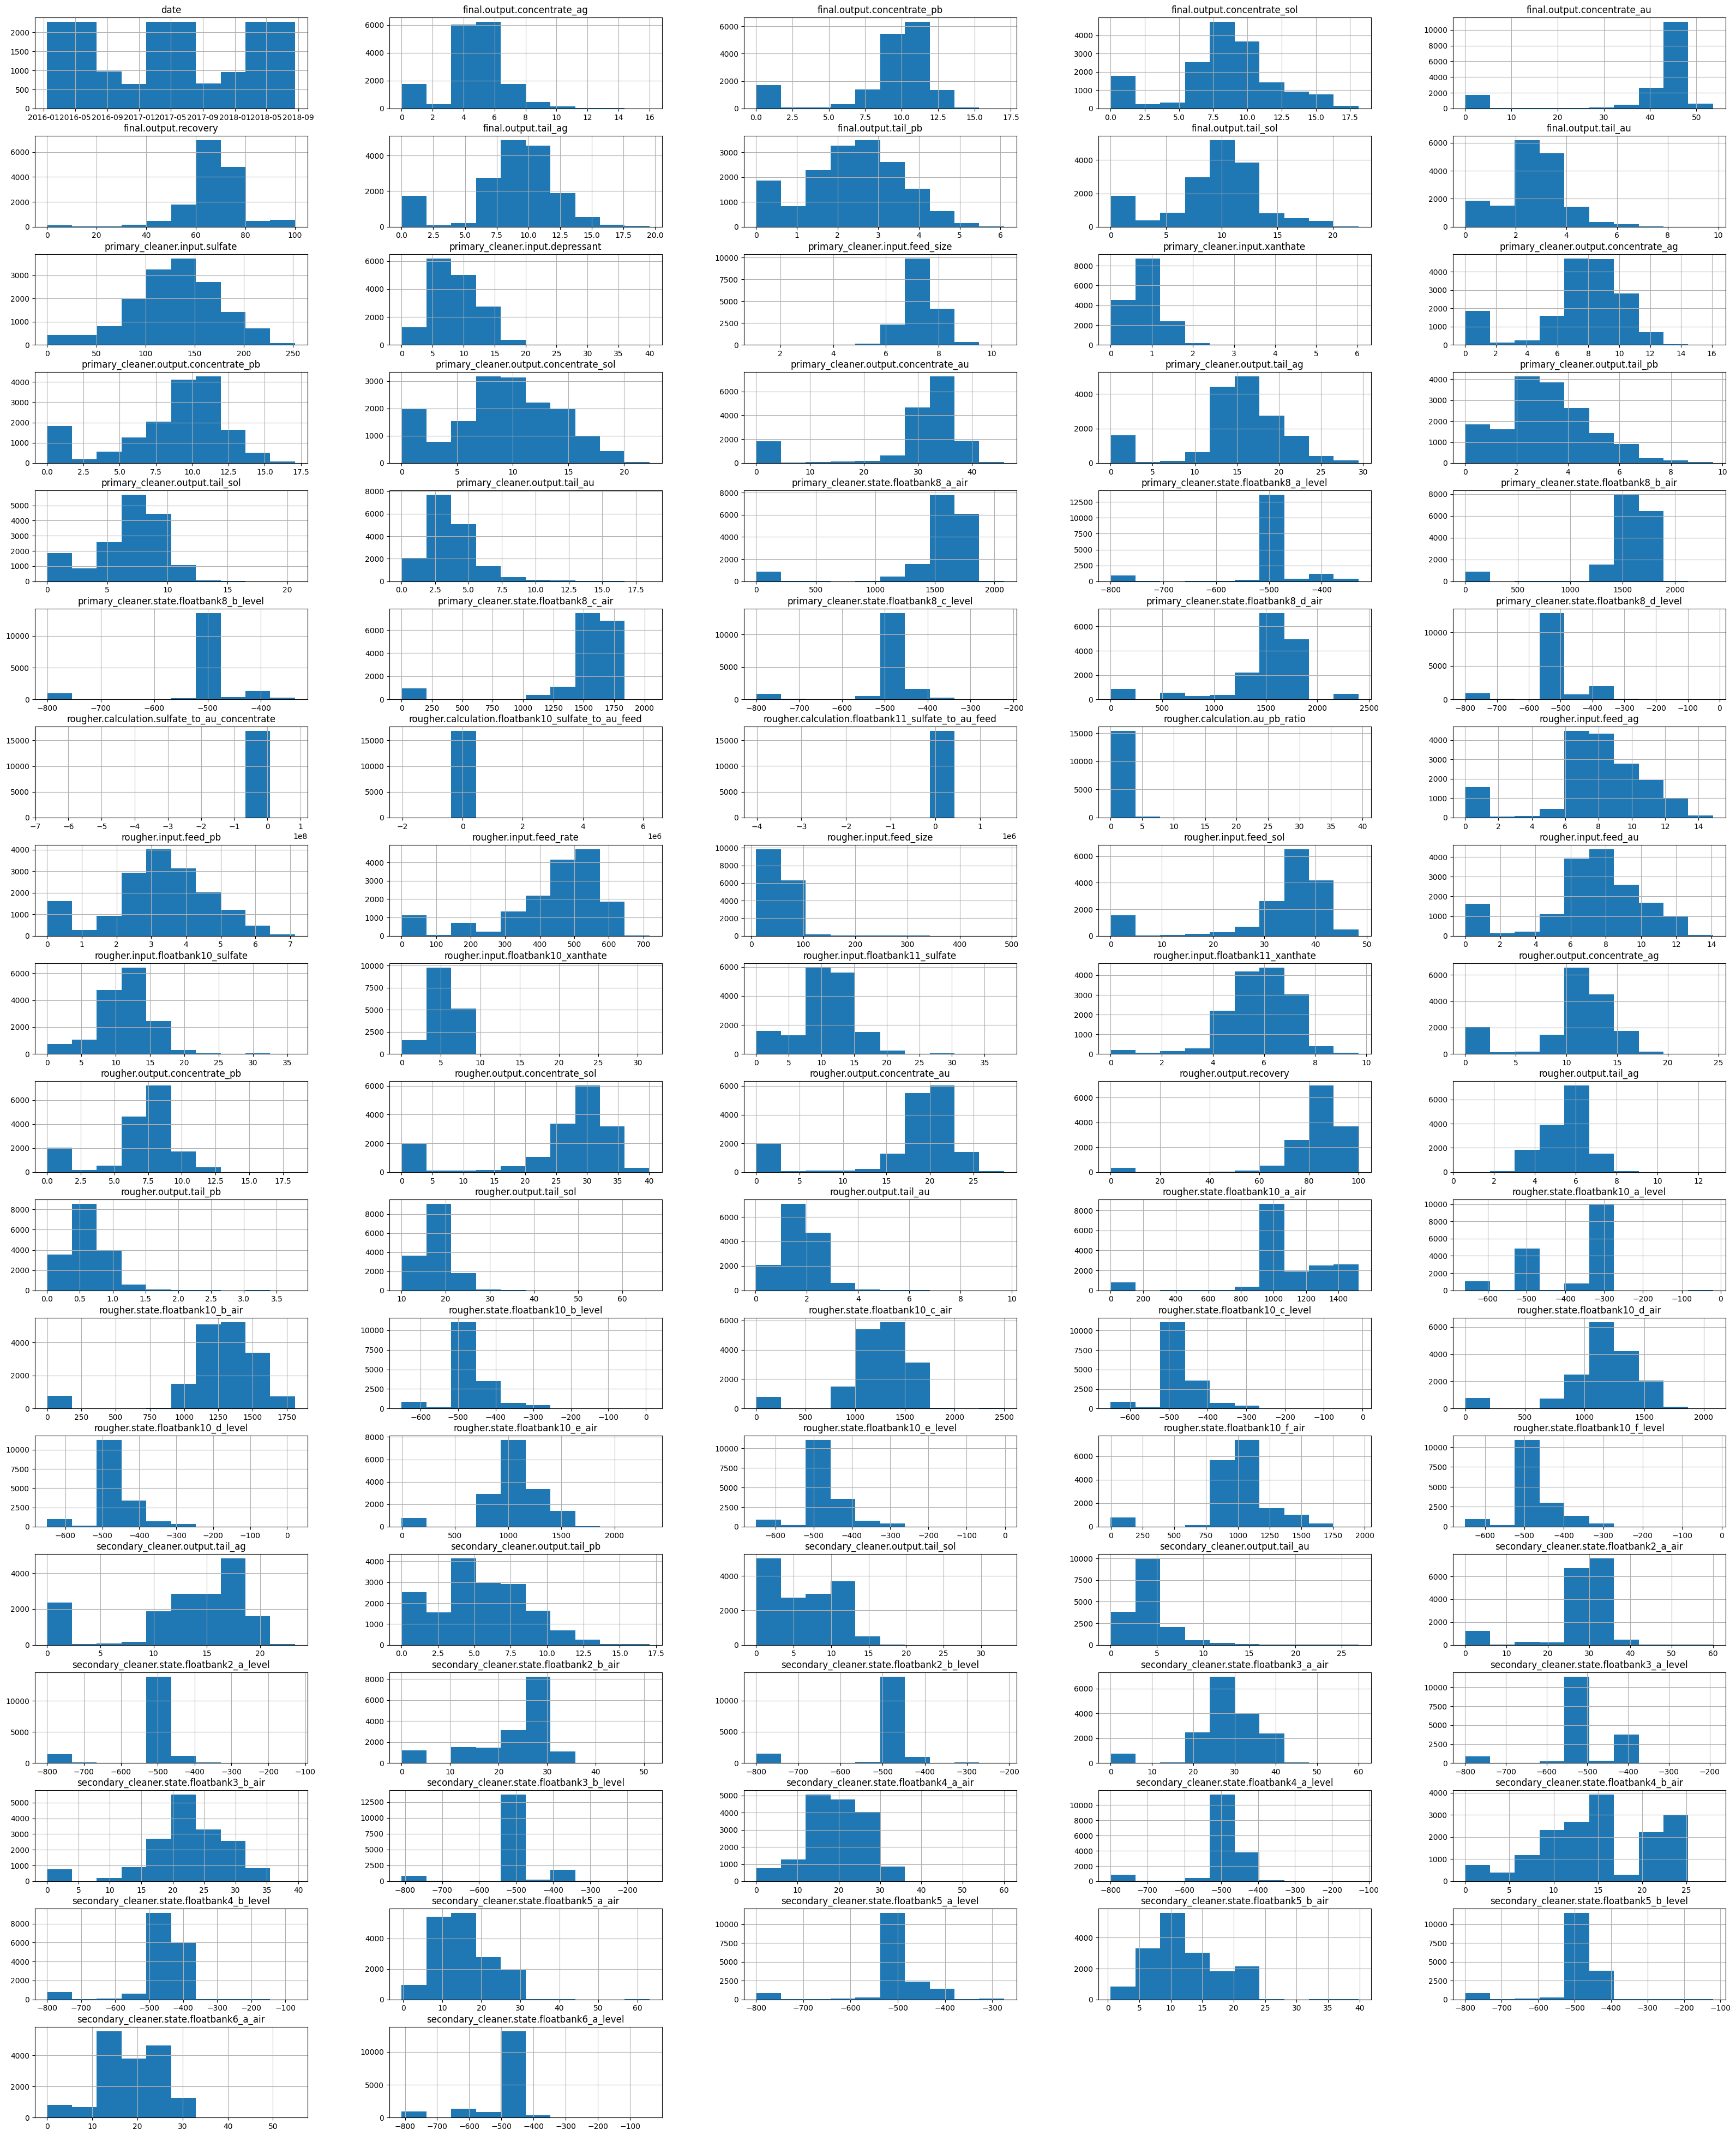

In [23]:
plt.subplots(figsize=(40,50))

for indice, valor in enumerate(train_df.columns):
    train_df.hist(column=valor, ax=plt.subplot(18, 5, indice + 1))
plt.show()

In [31]:
# Identifica las filas con patrones de valores faltantes
missing_pattern = train_df[train_df['rougher.output.recovery'].isnull()]

# ¿Qué porcentaje del proceso total representan?
print(f"Filas con missing targets: {len(missing_pattern)}")
print(f"Porcentaje del dataset: {len(missing_pattern)/len(train_df)*100:.1f}%")

# ¿Hay datos de entrada (input) en esas filas?
input_cols = [col for col in train_df.columns if 'input' in col]
print("¿Hay datos de entrada cuando faltan los outputs?")
print(missing_pattern[input_cols].isnull().sum())

Filas con missing targets: 2573
Porcentaje del dataset: 15.3%
¿Hay datos de entrada cuando faltan los outputs?
primary_cleaner.input.sulfate         1281
primary_cleaner.input.depressant      1224
primary_cleaner.input.feed_size          0
primary_cleaner.input.xanthate         880
rougher.input.feed_ag                   82
rougher.input.feed_pb                  105
rougher.input.feed_rate                500
rougher.input.feed_size                268
rougher.input.feed_sol                 196
rougher.input.feed_au                   83
rougher.input.floatbank10_sulfate     1013
rougher.input.floatbank10_xanthate     337
rougher.input.floatbank11_sulfate      585
rougher.input.floatbank11_xanthate    1470
dtype: int64


Lo que observo:
### Datos de entrada SÍ existen cuando faltan los outputs:
- Muchas variables de entrada tienen pocos o ningún valor faltante en esas 2573 filas
- Por ejemplo: primary_cleaner.input.feed_size tiene 0 faltantes
- rougher.input.feed_ag solo tiene 82 faltantes de 2573

### Esto significa:
- El proceso SÍ estaba funcionando (había alimentación, reactivos, etc.)
- Los sensores de salida fallaron o no se registraron los resultados
- NO son paradas completas del proceso

## Limpieza de datos para preparacion del modelo

In [32]:
#Vamos a crear un dataset limpio eliminando filas donde faltan los tagrgets
clean_train = train_df.dropna(subset=['rougher.output.recovery','final.output.recovery'])

## ENTRENAMIENTO DEL MODELO (CONSTRUCCION DEL MODELO)

In [33]:
entrenamiento, prueba = train_test_split(clean_train, test_size=0.25)

In [34]:
#VALORES DE ENTRENAMIENTO
features_train = entrenamiento.drop(['rougher.output.recovery', 'final.output.recovery'],axis=1)
target_train = entrenamiento[['rougher.output.recovery', 'final.output.recovery']]
features_train = features_train.select_dtypes(exclude=['datetime64[ns]'])

In [35]:

#VALORES DE PRUEBA
features_test = prueba.drop(['rougher.output.recovery', 'final.output.recovery'],axis=1)
target_test = prueba[['rougher.output.recovery', 'final.output.recovery']]

features_test = features_test.select_dtypes(exclude=['datetime64[ns]'])

In [36]:
features_train = features_train.replace([np.inf, -np.inf], np.nan).dropna()
target_train = target_train.loc[features_train.index]
features_test = features_test.replace([np.inf, -np.inf], np.nan).dropna()
target_test = target_test.loc[features_test.index]

In [38]:
modelo_rl = LinearRegression()

In [39]:
modelo_rl.fit(features_train,target_train)

LinearRegression()

## Metricas de evaluacion

In [40]:
modelo_rl.score(features_test, target_test)

0.8331280829315983

In [41]:
modelo_rl.score(features_train, target_train)

0.8475376685290383

## Modelo de DecissionTreeRegressor

In [42]:
modelo_tree = DecisionTreeRegressor()

In [43]:
modelo_tree.fit(features_train,target_train)

DecisionTreeRegressor()

In [44]:
modelo_tree.score(features_test, target_test)

0.8526621968806085

In [45]:
modelo_tree.score(features_train, target_train)

1.0

## VALIDACION CRUZADA

In [46]:
scores = cross_val_score(DecisionTreeRegressor(random_state=12345),
                         features_train, target_train, cv=5, scoring='r2')
print("R² en cada fold:", scores)
print("Promedio R²:", np.mean(scores))

R² en cada fold: [0.91838106 0.85949137 0.93005445 0.85362214 0.9036917 ]
Promedio R²: 0.8930481454563981


In [47]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],         # profundidad máxima del árbol
    'min_samples_split': [2, 5, 10, 20],      # mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4, 10]         # mínimo de muestras en cada hoja
}

param_grid = {
    'max_depth' : [3,4,7,10,None],
    'min_samples_split' : [2,5,10,20],
    'min_samples_leaf' : [1,2,4,10]
}

In [48]:
grid_search = GridSearchCV(
    estimator=modelo_tree,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2  
)
grid_search.fit(features_train, target_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=20; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=20; total time=   0.2s
[CV] END max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, min_sampl

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2', verbose=2)

In [ ]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor R² promedio en CV:", grid_search.best_score_)

In [56]:
best_model = grid_search.best_estimator_
test_score = best_model.score(features_test, target_test)

print("R² en test:", test_score)


R² en test: 0.8983198707778643


In [57]:
prediction=best_model.predict(features_test)

# sMAPE

In [64]:
def smape(y_true, y_pred):
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # evitar division por cero
    mask = denominator != 0
    return np.mean(numerator[mask] / denominator[mask]) * 100

In [65]:
valor_smapes = smape(target_test.values, prediction)
print("sMAPE del modelo:", valor_smapes)

sMAPE del modelo: 2.3126121642149764


In [66]:
smapes_original = smape(target_test.values, target_test.values)
print("sMAPE del dataset original (referencia):", smapes_original)

sMAPE del dataset original (referencia): 0.0


In [67]:
predicciones_rougher = prediction[:, 0]
predicciones_final = prediction[:, 1]

In [68]:
valores_reales_rougher = target_test['rougher.output.recovery']
valores_reales_final = target_test['final.output.recovery']

[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=20; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=20; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=20; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=10; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=20; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=10, min_samples_split=20; total time=   0.5s


In [69]:
# sMAPE por etapa
smape_rougher = smape(valores_reales_rougher, predicciones_rougher)
smape_final_stage = smape(valores_reales_final, predicciones_final)

# sMAPE ponderado
smape_final_total = 0.25 * smape_rougher + 0.75 * smape_final_stage

print("sMAPE rougher:", smape_rougher)
print("sMAPE final stage:", smape_final_stage)
print("sMAPE ponderado total:", smape_final_total)


sMAPE rougher: 1.8162870021414323
sMAPE final stage: 2.8021734106359526
sMAPE ponderado total: 2.555701808512323
